# numpy (nummerical python)
### Data structure to hold multy dimensional homogenneous nd-array
Commonly but not necessarily it would be numeric values

## TOC
- numpy arrays
  - np.array()
  - np.arange(1,10,2) # like range(1,10,2)
  - np.linspace(start, end, num_of_el)
  - indexing and slicing
- multidimensional arrays
  - np.array().shape attribute
  - np.array().reshape(array1_len, array2_len)
- masking

  

In [1]:
# the following line is jupyter notebook specific 
%matplotlib inline

## Why we need numpy
Most computational packages providing scientific functionality use NumPy’s array objects as the lingua franca for data exchange.
- NumPy arrays use much less memory than built-in Python sequences
- NumPy operations perform complex computations on entire arrays without the need for Python for loops.
- 

The following introduction to NumPy is based on the following article:
    http://www.datadependence.com/2016/05/scientific-python-numpy/
    
For futher details refer to the official quickstart documentation:
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

# Initialization of NumPy Arrays (ndArray or tensor)

You can initialize a one-dimensional NumPy array, for example, by passing a list or a tuple to `np.array`. Or you can even make a zero dimensional array by passing a scalar value.

In [2]:
import numpy as np
a = np.array(4)
b = np.array([3,4])
c = np.array([[3,4],[5,6]])
print(f'tensor axis (or dimensions) of the 3 ndArrays are:\n a shape: {a.shape} a dimension: {a.ndim},\n b shape: {b.shape} b dimension: {b.ndim},\n c shape: {c.shape} c dimension: {c.ndim},')

tensor axis (or dimensions) of the 3 ndArrays are:
 a shape: () a dimension: 0,
 b shape: (2,) b dimension: 1,
 c shape: (2, 2) c dimension: 2,


In [3]:
import numpy as np


a = np.array([0, 1, 2, 3, 4])
b = np.array((0, 1, 2, 3, 4))

print(a)
print(list(b))

[0 1 2 3 4]
[0, 1, 2, 3, 4]


Alternatively, you can create a one-dimensional NumPy array with the `np.arange` function, which is similar to its counterpart `range` in the standard library. Read it's documentation with `np.arange?`.

In [4]:
c = np.arange(9, 30, 3)
d = list(range(9, 30, 3))
print(c)
print(list(c))
print(d)

[ 9 12 15 18 21 24 27]
[9, 12, 15, 18, 21, 24, 27]
[9, 12, 15, 18, 21, 24, 27]


Similar to `np.arange`, `np.linspace` creates an array of evenly spaced numbers over a specified interval.

In [5]:
# linspace
pi_steps = np.linspace(0, 2 * np.pi, 5) # args: start, end, number of elements to produce. returns array of number of elements evenly spaced between start and end.
print(pi_steps)

[0.         1.57079633 3.14159265 4.71238898 6.28318531]


In [6]:
np.array([1,2.2,"hello"]) # ok but will get data type: Unicode (U32)
try:
    np.array([1,2.2,"hello"],dtype=np.int32)
except ValueError as e:
    print(e)

invalid literal for int() with base 10: 'hello'


## Indexing Elements

In [7]:
print(c)
print(c[0])  # Get element at index position 0
print(c[1])  # Get element at index position 1
print(c[2:6])  # Get subarray from index pos. 2 to excluding index pos. 6
print(c[1:-1:2])  # Get every second element from subarray (omitting first and last)

[ 9 12 15 18 21 24 27]
9
12
[15 18 21 24]
[12 18 24]


# Multi-Dimensional Arrays

You can initialize multi-dimensional arrays either explicitely as in the following.

In [8]:
two_dim = np.array([[ 0,  1,  2,  3],
                    [ 4,  5,  6,  7],
                    [ 8,  9, 10, 11]])

three_dim = np.array([[[ 0,  1,  2,  3],
                       [ 4,  5,  6,  7],
                       [ 8,  9, 10, 11]],

                      [[12, 13, 14, 15],
                       [16, 17, 18, 19],
                       [20, 21, 22, 23]],

                      [[24, 25, 26, 27],
                       [28, 29, 30, 31],
                       [32, 33, 34, 35]]])
print(two_dim.shape)
print(three_dim.shape)
print(f'aggregation over axis 0: {two_dim.sum(axis=0)}. Each column')
print(f'aggregation over axis 1: {two_dim.sum(axis=1)}. Each row')

(3, 4)
(3, 3, 4)
aggregation over axis 0: [12 15 18 21]. Each column
aggregation over axis 1: [ 6 22 38]. Each row


Or you create a one-dimensional array, which you `reshape` into the desired form.

### Matrix
coordinate system with (y,x) = (0,0) in upper left corner  
y = rows  
x = columns  

In [78]:
a = np.arange(11, 36)
b = a.reshape(5, 5)
b

array([[11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35]])

In [10]:
a = np.arange(11, 36).reshape(5, 5)

print(a)
print(a[0, 2]) # print the 3 value of the first subarray
print(a.shape)
np.arange(12).reshape(3, 4)


[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]
13
(5, 5)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
b = np.arange(0,10).reshape(2,5)
b

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

When defining shapes the shape coordinates are given in the order '*y*', '*x*' for two-dimensional arrays, '*z*', '*y*', '*x*' for three-dimensional arrays, and so on.

In [12]:
a = np.arange(60).reshape((4,3,5)) # z=4,y=3,x=5 
print(a)
print(a.shape)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]]

 [[45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]
(4, 3, 5)


## Index and slicing elements of multi-dimensional arrays

  * How does one create a 2D-array as in the following with NumPy?
  * How to select the highlighted data?

![slicing_img](images/numpy_2D_slicing_diagram_task.png)

In [13]:
a = np.arange(11, 36).reshape(5, 5)
# explanation: comma separates the arrays and colon does the positional selection
# 2dArray[rows, columns]
# double colon: get every n^th value e.g. ::2 menas print every second value and 2::3 means get every third value starting from third pos.
red    = a[0, 1:4]  # get one-dim. subarray of row 0, start:1 (pos=2) end:4 (not included, pos=4)
blue   = a[1:4, 0]  # get one-dim. subarrays (index 1,2,3) of column 0
green  = a[0:-1:2,::2] # get a two-dim. subarray of every second element by row and column
purple = a[:,1]    # get the second column

print('red:',red,'\nblue:',blue,'\ngreen:\n',green,'\npurple:',purple)

red: [12 13 14] 
blue: [16 21 26] 
green:
 [[11 13 15]
 [21 23 25]] 
purple: [12 17 22 27 32]


### Class exercise: table
![](images/numpy_slice_ex.png)
- on the above image find the 5 different slicings using only the array slicing notation

## 3D
#### reshape can be done with multiple dimensions. Here is an example with 3d  
`a = np.arange(0, 27).reshape((3, 3, 3))`  
![](images/cube.png)

In [14]:
np.arange(0, 27).reshape((3, 3, 3))

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [15]:
a = np.arange(0, 27).reshape((3, 3, 3)) # = (z, y, x)
#print('whole cube: \n',a, '\n---------------')

print('1st row (x-values): \n',a[0,0,:],'\n---------')
print('1st collumn (y-values, where x==0): \n',a[0,:,0],'\n---------')
print('1st depth (z-values, where y==0 and x==0): \n',a[:,0,0],'\n---------')
print('value of first side, second slice, third piece:\n',a[0, 1, 2], '\n-------------')  # equal to a[0][1][2] = 5
print('values of all x*z where y=2\n',a[:,2], '\n----------')  # equivivalent to a[:,2,:] all z, y=2, all x.
print('all z and y values where x = 2: \n',a[:,:,2], '\n--------')  # 
print('skip each second z,y,x: \n',a[::2,::2,::2])  # all z (skip each second) and all y (skip each second) etc.

1st row (x-values): 
 [0 1 2] 
---------
1st collumn (y-values, where x==0): 
 [0 3 6] 
---------
1st depth (z-values, where y==0 and x==0): 
 [ 0  9 18] 
---------
value of first side, second slice, third piece:
 5 
-------------
values of all x*z where y=2
 [[ 6  7  8]
 [15 16 17]
 [24 25 26]] 
----------
all z and y values where x = 2: 
 [[ 2  5  8]
 [11 14 17]
 [20 23 26]] 
--------
skip each second z,y,x: 
 [[[ 0  2]
  [ 6  8]]

 [[18 20]
  [24 26]]]


### Class exercise: cube
1. Slice out [12 13 14] from the above cube using only one slice. e.g: a[:,:,:]
2. Slice out [3 12 21].
3. Slice out all y-values where x is 2 and z is 0.

In [16]:
%reload_ext autoreload
# %aimport solutions.numpy_ex
from my_notebooks.solutions import numpy_ex as nump
nump.cube_ex()

[12 13 14]
[ 3 12 21]
[2 5 8]


### Properties of the numpy array

In [17]:
a = np.arange(10, 70, dtype=np.int8).reshape((4,3,5))

print('type: ',type(a))
print('dtype',a.dtype)
print('size',a.size)
print('shape',a.shape)
print('ndim: ',a.ndim)

type:  <class 'numpy.ndarray'>
dtype int8
size 60
shape (4, 3, 5)
ndim:  3


## Basic Operators

In [18]:
my_var = 'some other text'
print(f'some text {my_var} sdfsdf sdfsdf ')

some text some other text sdfsdf sdfsdf 


In [19]:
# np.ones()
a = np.ones((3, 3))
print(a, '\n-------------')
a[1] = 2 # asign value to multiple cells
a[2] = 3
b = np.arange(9).reshape(3, 3)

print(f'a {a.dtype}:\n',a)
print(f'b {b.dtype}:\n',b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
-------------
a float64:
 [[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]
b int64:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [26]:
# assign values to all cells in a row
import numpy as np
a = np.ones((3, 3), dtype=int)
a[1] = 2
a[2] = 3
b = np.arange(9).reshape(3, 3)

print('a: \n',a)
print('b: \n',b) 

print('a+b: \n',a + b) # sum values on each index

a: 
 [[1 1 1]
 [2 2 2]
 [3 3 3]]
b: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
a+b: 
 [[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In [27]:
print(a - b)

[[ 1  0 -1]
 [-1 -2 -3]
 [-3 -4 -5]]


In [28]:
print(a * b)

[[ 0  1  2]
 [ 6  8 10]
 [18 21 24]]


In [29]:
print(b / a)

[[0.         1.         2.        ]
 [1.5        2.         2.5       ]
 [2.         2.33333333 2.66666667]]


In [30]:
print(a ** 2)

[[1 1 1]
 [4 4 4]
 [9 9 9]]


In [31]:
a = np.arange(2,5)
print('a',a)
print('b',b)
print(a < b)

a [2 3 4]
b [[0 1 2]
 [3 4 5]
 [6 7 8]]
[[False False False]
 [ True  True  True]
 [ True  True  True]]


In [32]:
print(a > b)

[[ True  True  True]
 [False False False]
 [False False False]]


In [33]:
# elementwize comparing a 1d with a 2d tensor by "broadcasting" the 1d array n number of times where n== first axis of the 2d array
a = np.arange(0,10,2)
b = np.arange(0,10).reshape(2,5)
np.maximum(a,b)

array([[0, 2, 4, 6, 8],
       [5, 6, 7, 8, 9]])

In [34]:
array_a = np.array([1,2,3]) 
array_b = np.array([1,2,3]) 

print('adding all the products a[0,0]*b[0,0]+a[1,0]*b[1,0]...\n'
      ,np.dot(array_a, array_b))

print('adding all the products a[0,0]*b[0,0]+a[1,0]*b[1,0]...\n'
      ,array_a.dot(array_b))


adding all the products a[0,0]*b[0,0]+a[1,0]*b[1,0]...
 14
adding all the products a[0,0]*b[0,0]+a[1,0]*b[1,0]...
 14


In [41]:
print('a:\n',a)
print('row 2 and 3:\n',a[1:5]) # 5 does not exist, but no exception
print('equals:\n',a[1:3]==a[1:3])
print('sum all cells in first column',a[0:3].sum())
print('cumulated sum:\n',a.cumsum())
print('minimum cell value:\n',a.min())
print('maximum cell value:\n',a.max())

a:
 [0 2 4 6 8]
row 2 and 3:
 [2 4 6 8]
equals:
 [ True  True]
sum all cells in first column 6
cumulated sum:
 [ 0  2  6 12 20]
minimum cell value:
 0
maximum cell value:
 8


## Fancy Indexing



In [30]:
# use one np array as indices for another
import numpy as np
a = np.arange(0, 100, 10)
indices = np.array([1, 5, -1]) # or np.array([1,-1,3]) is also acceptable
print('a:\t\t\t',a)
print('indices:\t\t',indices)

print('data of indices:\t',a[indices])

a:			 [ 0 10 20 30 40 50 60 70 80 90]
indices:		 [ 1  5 -1]
data of indices:	 [10 50 90]


## Boolean masking is useful
retrieving only the numbers that matches the condition. The mask is a condition
and `a[mask]` is the part of a[] that matches the condition.



[ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -3.15108218e-01
 -4.33883739e-01 -5.45534901e-01 -6.48228395e-01 -7.40277997e-01
 -8.20172255e-01 -8.86599306e-01 -9.38468422e-01 -9.74927912e-01
 -9.95379113e-01 -9.99486216e-01 -9.87181783e-01 -9.58667853e-01
 -9.14412623e-01 -8.55142763e-01 -7.81831482e-01 -6.95682551e-01
 -5.98110530e-01 -4.90717552e-01 -3.75267005e-01 -2.53654584e-01
 -1.27877162e-01 -2.44929360e-16] 
 50


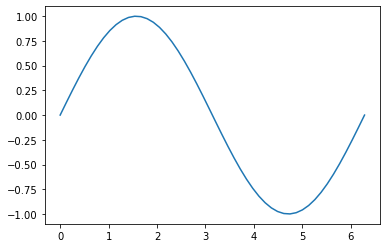

In [31]:
# X=Having 50 values between 0-2*pi, Y=sinus values to x
import matplotlib.pyplot as plt
 
xs = np.linspace(0, 2 * np.pi, 50)
ys = np.sin(xs)
print(ys, '\n',len(ys))
plt.plot(xs, ys)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


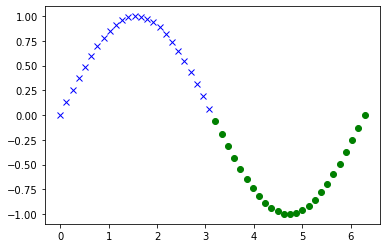

In [32]:
mask_positive = ys >= 0                        # condition for the blue crosses
print(mask_positive)
plt.plot(xs[mask_positive], ys[mask_positive], 'bx')    # rendering the blue plots only with filtered values
mask_negative = (ys < 0)                       # condition for the green dots
plt.plot(xs[mask_negative], ys[mask_negative], 'go')    # condition applied to xs and ys data sets
plt.show()

## Other types of Indexing

As we saw above, you can omit index numbers, which then default to index 0 or index for the last element of the array.

In [33]:
a = np.arange(0, 100, 10)
b = a[:5]                       # when first index is 0 we can omit it.
c = a[a >= 50]                  # mask provided to filter all values below 50
d = a[(a%20 == 0) & (a != 40)]  # more complex conditinal mask
e = np.where((a%20 == 0) & (a != 40), a, None) # mask condition like ternary operator

print('a:\n',a,'\nb:\n',b,'\n:c\n',c,'\nd:\n',d,'\ne:\n',e)

a:
 [ 0 10 20 30 40 50 60 70 80 90] 
b:
 [ 0 10 20 30 40] 
:c
 [50 60 70 80 90] 
d:
 [ 0 20 60 80] 
e:
 [0 None 20 None None None 60 None 80 None]


## Where

the `where()` function is another useful way of retrieving elements of an array conditionally. Simply pass it a condition and it will return a tuple of lists of elements where that condition is true.

In [80]:
a = np.arange(0, 100, 10).reshape(2,5)

b = np.where(a < 50)
print(a)
print(b)

print(a[b])

[[ 0 10 20 30 40]
 [50 60 70 80 90]]
(array([0, 0, 0, 0, 0]), array([0, 1, 2, 3, 4]))
[ 0 10 20 30 40]


In [68]:
a = np.arange(0, 100, 10)
b = np.where(a < 50)     # returns a tuple
c = np.where(a >= 50)[0] # returns an array (first element of the tuple is the data array)

print('b',b)
print('a contains all values: ',a)
print('b contains the indices of the filtered values: ',b,type(b))
print('c contains the filtered values: in',c,type(c))
print('using the indices returned by np.where to get the values:\n',a[c])

b (array([0, 1, 2, 3, 4]),)
a contains all values:  [ 0 10 20 30 40 50 60 70 80 90]
b contains the indices of the filtered values:  (array([0, 1, 2, 3, 4]),) <class 'tuple'>
c contains the filtered values: in [5 6 7 8 9] <class 'numpy.ndarray'>
using the indices returned by np.where to get the values:
 [50 60 70 80 90]


### other useful operations
##### copy ndarray
`np.copy(arr)`

In [45]:
tens = np.arange(10,101,10)
tens_copy = np.copy(tens[0:4])
tens_copy

array([10, 20, 30, 40])

### Class exercise: masking
- For the dataset: `data = np.arange(1,101).reshape(10,10)`
  - apply a mask that will return only the even numbers
  - using `np.where()` return only numbers that ends with 6


# Why do we care about NumPy?

Because we want to get things done. As you remember from the last session about plotting, we had to write quite a bit of code to compute the histograms for the age distribution within Copenhagen citizens per year.

By representing our input data as a matrix, i.e., a two-dimensional array, and using boolean indexing, we can generate for example the histograms way more concisely and with way fewer lines of code.

In [35]:
%%bash
head data/befkbhalderstatkode.csv

AAR,BYDEL,ALDER,STATKODE,PERSONER
2015,1,0,5100,614
2015,1,0,5104,2
2015,1,0,5106,1
2015,1,0,5110,1
2015,1,0,5120,4
2015,1,0,5126,1
2015,1,0,5130,5
2015,1,0,5140,3
2015,1,0,5150,5


In [8]:
# read data from csv file into 2d numpy array
import numpy as np
filename = './data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df
print(type(bef_stats_df),' of size: ',bef_stats_df.size)
print('The skip_header=1 means that we have only the data\n\nfirst line:\n',bef_stats_df[0],'\nlast line\n',bef_stats_df[len(bef_stats_df)-1])

<class 'numpy.ndarray'>  of size:  2712585
The skip_header=1 means that we have only the data

first line:
 [2015    1    0 5100  614] 
last line
 [1992   99   93 5100    1]


In [9]:
dd = bef_stats_df
mask = (dd[:,0] == 1998) # filter only rows that has value = 1998 in column 0
dd[mask]

array([[1998,    1,    0, 5100,  500],
       [1998,    1,    0, 5106,    3],
       [1998,    1,    0, 5110,    5],
       ...,
       [1998,   99,   85, 5100,    1],
       [1998,   99,   91, 5100,    1],
       [1998,   99,   99, 5100,    1]], dtype=uint64)

### Amount of 18 years old Danes in CPH?

For example, how can we quickly compute the amount of all Danes (`STATKODE == 5100`) with age 18 in **all neighbourhoods** for the year 2015?

We just collect that data by expressing it as a conjunction of constraints and subsequently sum it up.


In [87]:
mask = (dd[:,0] == 2015) & (dd[:,2] == 18) & (dd[:,3] == 5100)
print(dd[mask])
print('all the areas',set(dd[:,1]))
print('18y in each area',list(dd[mask][:,4]))
print('sum all the cph areas\n',np.sum(dd[mask][:,4]))

[[2015    1   18 5100  378]
 [2015    2   18 5100  577]
 [2015    3   18 5100  513]
 [2015    4   18 5100  309]
 [2015    5   18 5100  428]
 [2015    6   18 5100  349]
 [2015    7   18 5100  406]
 [2015    8   18 5100  339]
 [2015    9   18 5100  359]
 [2015   10   18 5100  424]
 [2015   99   18 5100   20]]
all the areas {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99}
18y in each area [378, 577, 513, 309, 428, 349, 406, 339, 359, 424, 20]
sum all the cph areas
 4102


(1.0, 10.0, 300.0, 600.0)

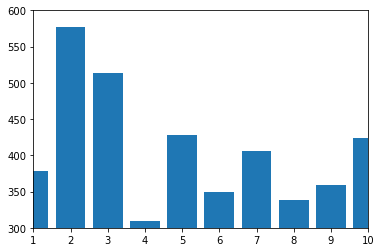

In [88]:
import matplotlib.pyplot as plt
plt.bar(list(set(dd[:,1])), list(dd[mask][:,4]))
plt.axis([1,10,300,600])

### Distribution of French and Germans in CPH?


Similarly, in which neighbourhood lifed the most Frenchmen and Germans respectively in 2015?

The following dictionary of neighbourhood codes is created from the explanatory text on the municipalities homepage.

In [89]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

In [90]:
def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

In [92]:
french_mask = (dd[:,0] == 2015) & (dd[:,3] == 5130)
german_mask = (dd[:,0] == 2015) & (dd[:,3] == 5180)

french = np.array([number_of_people_per_neighbourhood(n, french_mask) for n in neighb.keys()])
print(french)
germans = np.array([number_of_people_per_neighbourhood(n, german_mask) for n in neighb.keys()])
germans

[346 337 305 325 133  85  65 135 155 243  27]


array([544, 557, 653, 474, 258, 166, 197, 314, 372, 460,  26],
      dtype=uint64)

In [43]:
index_max_fr = np.argmax(french)
index_max_de = np.argmax(germans)

msg = 'The majority of {} {} are living in {}'
french_neighbourhood_index = list(neighb.keys())[index_max_fr]
print(msg.format(french.max(), 'Frenchmen', neighb[french_neighbourhood_index]))
print(msg.format(germans.max(), 'Germans', neighb[list(neighb.keys())[index_max_de]]))

The majority of 346 Frenchmen are living in Indre By
The majority of 653 Germans are living in Nørrebro


### From which country came the most imigrants in 2015?

Popular belief says that most imigrants come somewhere from the middle-east. But is it true?

To answer this question, convert the cuntry code data from Danmarks Statistik (http://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode.aspx) into a Python dictionary.

In [1]:
country_codes = {0: 'Uoplyst (1)', 5001: 'Uoplyst (2)', 5100: 'Danmark', 5101: 'Grønland', 
                 5102: 'Udlandet uoplyst', 5103: 'Statsløs', 5104: 'Finland', 
                 5105: 'Island, ligeret dansk', 5106: 'Island', 5107: 'Liechtenstein', 
                 5108: 'Luxembourg', 5109: 'Monaco', 5110: 'Norge', 5114: 'Europa uoplyst', 
                 5115: 'Kongelig', 5120: 'Sverige', 5122: 'Albanien', 5124: 'Andorra', 
                 5126: 'Belgien', 5128: 'Bulgarien', 5129: 'Tjekkoslovakiet', 
                 5130: 'Frankrig', 5134: 'Grækenland', 5140: 'Nederlandene', 
                 5142: 'Irland', 5150: 'Italien', 5151: 'Serbien og Montenegro', 
                 5152: 'Jugoslavien', 5153: 'Malta', 5154: 'Polen', 5156: 'Portugal', 
                 5158: 'Rumænien', 5159: 'San Marino', 5160: 'Schweiz', 
                 5162: 'Sovjetunionen', 5164: 'Spanien', 5170: 'Storbritannien', 
                 5172: 'Tyrkiet', 5174: 'Ungarn', 5176: 'Vatikanstaten', 5180: 'Tyskland', 
                 5182: 'Østrig', 5199: 'Europa uoplyst', 5202: 'Algeriet', 5204: 'Angola', 
                 5207: 'Botswana', 5213: 'Burundi', 5214: 'Etiopien', 5215: 'Comorerne', 
                 5216: 'Eritrea', 5222: 'Gambia', 5228: 'Ghana', 5230: 'Ækvatorialguinea', 
                 5231: 'Guinea-Bissau', 5232: 'Guinea', 5233: 'Kap Verde', 5234: 'Kenya', 
                 5235: 'Lesotho', 5236: 'Liberia', 5238: 'Libyen', 5240: 'Mozambique', 
                 5242: 'Madagaskar', 5243: 'Mali', 5244: 'Marokko', 5245: 'Mauritius', 
                 5246: 'Nigeria', 5247: 'Namibia', 5248: 'Marshalløerne', 
                 5255: 'Sierra Leone', 5258: 'Sudan', 5259: 'Swaziland', 5260: 'Sydsudan', 
                 5262: 'Sydafrika', 5266: 'Tanzania', 5268: 'Tunesien', 5269: 'Uganda', 
                 5272: 'Egypten', 5273: 'Tuvalu', 5274: 'Kiribati', 5275: 'Vanuatu', 
                 5276: 'Centralafrikanske Republik', 5277: 'Cameroun', 
                 5278: 'Congo, Demokratiske Republik', 5279: 'Congo, Republikken', 
                 5281: 'Benin', 5282: 'Elfenbenskysten', 5283: 'Gabon', 5284: 'Mauretanien', 
                 5285: 'Niger', 5287: 'Rwanda', 5288: 'Senegal', 5289: 'Somalia', 
                 5292: 'Tchad', 5293: 'Togo', 5294: 'Burkina Faso', 5295: 'Zimbabwe', 
                 5296: 'Zambia', 5297: 'Malawi', 5298: 'Seychellerne', 
                 5299: 'Afrika uoplyst', 5302: 'Argentina', 5303: 'Bahamas', 
                 5304: 'Bolivia', 5305: 'Barbados', 5306: 'Brasilien', 5308: 'Guyana', 
                 5309: 'Antigua og Barbuda', 5310: 'Nauru', 
                 5311: 'Skt. Vincent og Grenadinerne', 5314: 'Canada', 5316: 'Chile', 
                 5318: 'Colombia', 5319: 'Syd- og Mellemamerika uoplyst', 
                 5322: 'Costa Rica', 5324: 'Cuba', 5326: 'Dominikanske Republik', 
                 5328: 'Ecuador', 5338: 'Guatemala', 5339: 'Grenada', 5342: 'Haiti', 
                 5344: 'Surinam', 5345: 'Dominica', 5347: 'Skt. Lucia', 5348: 'Honduras', 
                 5352: 'Jamaica', 5354: 'Mexico', 5356: 'Nicaragua', 5358: 'Panama', 
                 5364: 'Paraguay', 5366: 'Peru', 5372: 'El Salvador', 
                 5374: 'Trinidad og Tobago', 5376: 'Uruguay', 5390: 'USA', 
                 5392: 'Venezuela', 5395: 'Vestindiske Øer', 5397: 'Nordamerika uoplyst', 
                 5398: 'Syd- og Mellemamerika uoplyst', 5402: 'Yemen', 
                 5403: 'Forenede Arabiske Emirater', 5404: 'Afghanistan', 5406: 'Bahrain', 
                 5408: 'Bhutan', 5410: 'Bangladesh', 5412: 'Brunei', 5414: 'Myanmar', 
                 5416: 'Cambodja', 5418: 'Sri Lanka', 5422: 'Cypern', 5424: 'Taiwan', 
                 5432: 'Indien', 5434: 'Indonesien', 5435: 'Østtimor', 5436: 'Irak', 
                 5438: 'Iran', 5442: 'Israel', 5444: 'Japan', 5446: 'Jordan', 5448: 'Kina', 
                 5452: 'Kuwait', 5454: 'Laos', 5456: 'Libanon', 5457: 'Maldiverne', 
                 5458: 'Malaysia', 5459: 'Mongoliet', 5462: 'Oman', 5464: 'Nepal', 
                 5466: 'Nordkorea', 5468: 'Vietnam (1)', 5471: 'Asien uoplyst', 
                 5472: 'Pakistan', 5474: 'Filippinerne', 5478: 'Saudi-Arabien', 
                 5482: 'Singapore', 5484: 'Sydkorea', 5486: 'Syrien', 
                 5487: 'Mellemøsten uoplyst', 5488: 'Vietnam (2)', 5492: 'Thailand', 
                 5496: 'Qatar', 5499: 'Asien uoplyst', 5502: 'Australien', 5505: 'Tonga', 
                 5508: 'Fiji', 5514: 'New Zealand', 5522: 'Samoa', 5525: 'Djibouti', 
                 5526: 'Belize', 5534: 'Papua Ny Guinea', 5599: 'Øer i Stillehavet', 
                 5607: 'Estland', 5609: 'Letland', 5611: 'Litauen', 
                 5621: 'Sao Tome og Principe', 5623: 'Salomonøerne', 
                 5625: 'Skt. Kitts og Nevis', 5700: 'Rusland', 5704: 'Ukraine', 
                 5706: 'Hviderusland', 5708: 'Armenien', 5710: 'Aserbajdsjan', 
                 5712: 'Moldova', 5714: 'Usbekistan', 5716: 'Kasakhstan', 
                 5718: 'Turkmenistan', 5720: 'Kirgisistan', 5722: 'Tadsjikistan', 
                 5724: 'Georgien', 5750: 'Kroatien', 5752: 'Slovenien', 
                 5754: 'Bosnien-Hercegovina', 5756: 'Makedonien', 5757: 'Serbien', 
                 5758: 'Jugoslavien, Forbundsrepublikken', 5759: 'Montenegro', 
                 5761: 'Kosovo', 5776: 'Tjekkiet', 5778: 'Slovakiet', 5779: 'Cookøerne', 
                 5800: 'Land ukendt (2)', 5901: 'Færøerne uoplyst', 5902: 'Færøerne', 
                 5999: 'Land ukendt (1)'}

In [24]:
data = dd
nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"] 
old_nords = 0 
for x,y in country_codes.items(): 
    if y in nordic_countries: 
        #print(x) 
        print(y) 
        mask = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == x) 
        country_sum = (data[mask][0:,4].sum()) 
        print(country_sum)
        old_nords += country_sum
print("Nordiske beboere over 65 år: ",old_nords) 

# control the sum by slicing a different way
control = dd[np.isin(dd[:,3],[5101,5104,5106,5110,5120])]
control = control[(control[:,0] == 2015) & (control[:,2]>65)]
control[:,4].sum()

Grønland
0
Finland
72
Island
33
Norge
236
Sverige
267
Nordiske beboere over 65 år:  608.0


608

In [45]:
import json
with open('data/befkbh_stat_code.json','w') as f:
    f.write(json.dumps(country_codes))

In [94]:
!head data/befkbh_stat_code.json

{"0": "Uoplyst (1)", "5001": "Uoplyst (2)", "5100": "Danmark", "5101": "Gr\u00f8nland", "5102": "Udlandet uoplyst", "5103": "Statsl\u00f8s", "5104": "Finland", "5105": "Island, ligeret dansk", "5106": "Island", "5107": "Liechtenstein", "5108": "Luxembourg", "5109": "Monaco", "5110": "Norge", "5114": "Europa uoplyst", "5115": "Kongelig", "5120": "Sverige", "5122": "Albanien", "5124": "Andorra", "5126": "Belgien", "5128": "Bulgarien", "5129": "Tjekkoslovakiet", "5130": "Frankrig", "5134": "Gr\u00e6kenland", "5140": "Nederlandene", "5142": "Irland", "5150": "Italien", "5151": "Serbien og Montenegro", "5152": "Jugoslavien", "5153": "Malta", "5154": "Polen", "5156": "Portugal", "5158": "Rum\u00e6nien", "5159": "San Marino", "5160": "Schweiz", "5162": "Sovjetunionen", "5164": "Spanien", "5170": "Storbritannien", "5172": "Tyrkiet", "5174": "Ungarn", "5176": "Vatikanstaten", "5180": "Tyskland", "5182": "\u00d8strig", "5199": "Europa uoplyst", "5202": "Algeriet", "5204": "Angola", "5207": "Bots

In [47]:
# unique years in the dataset:
# x = year, 
unique_years = np.unique(dd[:,0]) # all yś where x is index 0 (which is year)
unique_years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=uint64)

In [48]:
# dataset is [year=0, age=1, area=2, nationality=3, amount=4]

# unique nationalities/citizenships:
c_keys = np.unique(dd[:,3])
c_keys = c_keys[c_keys != 5100] #remove danish citizens
#print(c_keys)
mask_year_2012 = dd[:,0] == 2012
mask_swedish = dd[:,3] == 5120

#SUM all the swedish people in 2012
np.sum(dd[(mask_year_2012) & (mask_swedish)][:,4])


4230

## Exercise numpy and csv

1. load the csv file: befkbhalderstatkode.csv into a numpy ndarray
2. How many german children of 0 years were there in Copenhagen in 2015?
3. create a function that can take any combination of the 4 parameters:AAR,BYDEL,ALDER,STATKODE and return population data
4. create a new function like previous so that it can sum values for all ages if age is not provided to the function
5. further add functionality to sum values if citizenship or area was not provided to function.
6. create a new function that can also give average values for each year if year whas not provided.
7. create a function, that given year and nationality can return which area had the most of these nationals by that year. Test it by finding out which area had the most Moroccan people in both 1992 and 2015
8. Find the Area(s) where fewest foreingers lived in Copenhagen in 1992 and 2015 respectively
9. Find out what age most French people have in 2015

## Find largest nationality group
From the Copenhagen citizen data we will find out 2 things about year 2015:
1. What nationality group (beside danish) is the largest
2. How many people are in that group


In [49]:
# create a set of conuntry codes with people living in Copenhagen
c_keys = np.unique(dd[:,3])
# we are interested in non-danes only
c_keys = c_keys[c_keys != 5100]
print('all the country keys:\n',c_keys)
# and again we only consider 2015
mask_year_2015 = (dd[:,0] == 2015)


# list comprehension to loop all country codes and sum all citizens by country_code for year 2015
number_per_citizen_group = np.array([np.sum(dd[mask_year_2015 & (dd[:,3] == c_code)][:,4]) for c_code in c_keys])
print('all the number of people in each citizen group:\n',number_per_citizen_group)
# use np.argmax to find the index of the largest group
idx_of_largest_group = np.argmax(number_per_citizen_group)
print('index (or indices if more) of the largest group: ',idx_of_largest_group)
county_code = c_keys[idx_of_largest_group] # using the index of the largest summed up group and finding the value of that index in another slice of the same dataset
print('c_k:',county_code)
country_name = country_codes[county_code] # this is a dictionary where key=country_code and value=country name
print('country_name: ',country_name)
print('¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤RESULT¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤')
print(f'{number_per_citizen_group.max()} inhabitants come from {country_name}')
print('number pr c group:\n',number_per_citizen_group)

all the country keys:
 [5001 5102 5103 5104 5105 5106 5107 5108 5110 5115 5120 5122 5126 5128
 5129 5130 5134 5140 5142 5150 5151 5152 5153 5154 5156 5158 5159 5160
 5162 5164 5170 5172 5174 5180 5182 5202 5204 5207 5213 5214 5215 5216
 5222 5228 5231 5232 5233 5234 5235 5236 5238 5240 5242 5243 5244 5245
 5246 5247 5255 5258 5259 5262 5266 5268 5269 5272 5275 5277 5278 5279
 5281 5282 5283 5284 5285 5287 5288 5289 5292 5293 5294 5295 5296 5297
 5298 5299 5302 5303 5304 5305 5306 5308 5311 5314 5316 5318 5322 5324
 5326 5328 5338 5339 5342 5344 5345 5347 5348 5352 5354 5356 5358 5364
 5366 5372 5374 5376 5390 5392 5402 5403 5404 5406 5408 5410 5412 5414
 5416 5418 5422 5424 5432 5434 5436 5438 5442 5444 5446 5448 5452 5454
 5456 5457 5458 5459 5462 5464 5466 5472 5474 5478 5482 5484 5486 5487
 5488 5492 5496 5499 5502 5505 5508 5514 5522 5525 5526 5607 5609 5611
 5625 5700 5704 5706 5708 5710 5712 5714 5716 5718 5720 5722 5724 5750
 5752 5754 5756 5757 5758 5759 5761 5776 5778 5902 599

In [50]:
#
no_per_c_sorted = sorted(np.copy(number_per_citizen_group))
print(no_per_c_sorted)
print('.------------------------------------------------------------------------------------------')
print('group with most people: ', no_per_c_sorted[-1])

idx_highest_pop = np.where(number_per_citizen_group==no_per_c_sorted[-1])

snd_max_idx = idx_highest_pop[0][0] # [0][0] from ndarray to array to scalar
print('max idx: ',snd_max_idx)
#no_per_c[no_per_c == no_per_c_orig[-2]][0]
country_codes[c_keys[snd_max_idx]]

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 11, 11, 11, 12, 12, 12, 13, 14, 15, 15, 15, 16, 16, 17, 19, 20, 21, 22, 23, 23, 24, 24, 25, 25, 25, 27, 27, 28, 29, 29, 29, 31, 32, 34, 36, 38, 40, 42, 47, 48, 50, 51, 54, 57, 58, 59, 60, 68, 68, 84, 86, 93, 99, 102, 121, 121, 122, 122, 125, 128, 129, 132, 137, 137, 143, 146, 149, 151, 152, 161, 175, 192, 195, 196, 199, 200, 217, 223, 253, 273, 273, 278, 285, 321, 321, 323, 343, 364, 377, 383, 387, 404, 447, 460, 560, 565, 585, 605, 609, 632, 658, 688, 744, 787, 787, 796, 849, 899, 977, 1093, 1348, 1396, 1413, 1487, 1499, 1518, 1544, 1692, 1891, 1968, 1999, 2087, 2156, 2168, 2534, 2544, 2552, 3069, 3792, 3906, 4021, 4093, 4502, 4523, 4745]
.------------------------------------------------------------------------------------------
group with most people:  4745
max idx:  10


'Sverige'

In [51]:
def transformByMaks(data, mask):
    """
    arg1 is the dataset on the form [[year, area, age, nationality, amount]]
    arg2 is the mask on the form data[:,3] == 5120 to find swedish or data[:,0] == 1999 to filter on year
    returns a new numpy array with the filtered data.
    """
    return data[mask]

def getDataByX(data, x_value):
    params = {'year':0, 'area':1, 'age':2, 'nationality': 3}
    x = params[x_value]
    return {year:np.sum(data[:,4]) for year in np.unique(data[x])}
    
mask = (dd[:,2] == 18) & (dd[:,3] == 5100)
result = transformByMaks(dd, mask)
print(result)
print(getDataByX(result, 'year'))

[[2015    1   18 5100  378]
 [2015    2   18 5100  577]
 [2015    3   18 5100  513]
 ...
 [1992    9   18 5100  357]
 [1992   10   18 5100  441]
 [1992   99   18 5100   14]]
{1: 80603, 18: 80603, 378: 80603, 2015: 80603, 5100: 80603}


### Computing a Histogram Concisely

As said, we are using NumPy to express our data queries more concisely. The first three lines of the following program compute the histogram of ages in 2015. That is, in three lines we can express the same as in the 13 lines of , see the function `get_population_stat` under *Bar Plots* in *Intro to Plotting*.

<BarContainer object of 107 artists>

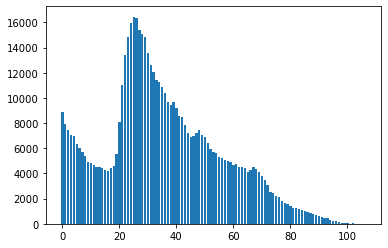

In [64]:
import matplotlib.pyplot as plt
mask_2015 = (dd[:,0] == 2015)
set_of_ages = np.unique(dd[mask_2015][:,2])
freq_ages = np.array([np.sum(dd[mask_2015 & (dd[:,2] == age)][:,4]) 
                      for age in set_of_ages])

plt.bar(set_of_ages, freq_ages)


And computing the increase of foreign population from 2014 to 2015 is similarly easy. Read and explain the following program.

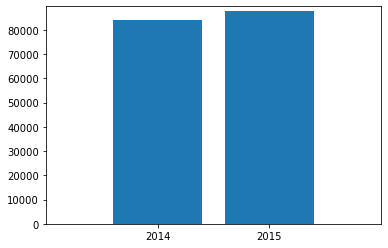

In [53]:
mask = (dd[:,3] != 5100)
sum_14 = np.sum(dd[(dd[:,0] == 2014) & mask][:,4])
sum_15 = np.sum(dd[(dd[:,0] == 2015) & mask][:,4])

plt.axis([2013, 2016, 0, max([sum_14, sum_15]) + 2000])
plt.bar([2014, 2015], [sum_14, sum_15], width=0.8,  align='center')
plt.xticks([2014, 2015])
plt.ticklabel_format(useOffset=False)

## class exercise: extracting
Based on the Copenhagen population data do the following (not including danish citizens):
1. Find the 10 largest population groups
2. Find the 10 largest population groups of children (0-17 y.o.) 
3. Create a barplot with the 10 largest groups on x-axis and 2 bars of both adult and children on y-axis
  - make one bar red and the other green
  - give them labels

### Numpy ufuncs
ufuncs (universal functions) are a way to use vectorized computation rather than iterate over a collection and do elementwize computation. An example of a ufunc:
```python
x = [1, 2, 3, 4]
y = [4, 5, 6, 7]
z = np.add(x, y)
```
#### Create our own ufunc
By using numpys: `np.frompyfunc(function_name, number_of_input_arrays, number_of_returned_arrays)`

In [25]:
import numpy as np

def myadd(x, y):
    return x+y

myadd = np.frompyfunc(myadd, 2, 1)

print(myadd([1, 2, 3, 4], [5, 6, 7, 8]))

[6 8 10 12]


# Self study: For what else can we use NumPy?

Images are just multi-dimensional arrays. For example, lets have a look at a small running Commander Keen

![keen](images/commander_keen.png)

With the following code we receive the image and convert it into a NumPy array so that we can inspect the image data.

In [54]:
!wget -O data/commander_keen_sprite_run.gif https://16couleurs.files.wordpress.com/2014/01/commander_keen_sprite_run.gif?w=611

--2021-02-23 11:20:25--  https://16couleurs.files.wordpress.com/2014/01/commander_keen_sprite_run.gif?w=611
Resolving 16couleurs.files.wordpress.com (16couleurs.files.wordpress.com)... 192.0.72.22, 192.0.72.23
Connecting to 16couleurs.files.wordpress.com (16couleurs.files.wordpress.com)|192.0.72.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 609 [image/gif]
Saving to: ‘data/commander_keen_sprite_run.gif’

data/commander_keen 100%[===================>]     609  --.-KB/s    in 0s      

2021-02-23 11:20:26 (162 MB/s) - ‘data/commander_keen_sprite_run.gif’ saved [609/609]



In [55]:
%%bash
wget -O data/keen.gif https://16couleurs.files.wordpress.com/2014/01/commander_keen_sprite_run.gif

--2021-02-23 11:20:26--  https://16couleurs.files.wordpress.com/2014/01/commander_keen_sprite_run.gif
Resolving 16couleurs.files.wordpress.com (16couleurs.files.wordpress.com)... 192.0.72.22, 192.0.72.23
Connecting to 16couleurs.files.wordpress.com (16couleurs.files.wordpress.com)|192.0.72.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 609 [image/gif]
Saving to: ‘data/keen.gif’

     0K                                                       100%  219M=0s

2021-02-23 11:20:26 (219 MB/s) - ‘data/keen.gif’ saved [609/609]



In [56]:
#### import webget
import numpy as np
from PIL import Image


im = Image.open('data/commander_keen_sprite_run.gif')
# convert the data to RGB color space
rgb_im = im.convert('RGB')
print(rgb_im)
im_array = np.asarray(rgb_im)
print(im_array.shape, ' represents the rows(y),columns(x) and pixelcolor (as rgb)')
print('255 255 255 is white to see other colors lets slice away the first 10 squares of data: \n\n',im_array[10:11,7:17,0:])
im_data = np.copy(im_array)  # we have to copy the data as we want to modify it later

<PIL.Image.Image image mode=RGB size=48x64 at 0x7F6E81A15290>
(64, 48, 3)  represents the rows(y),columns(x) and pixelcolor (as rgb)
255 255 255 is white to see other colors lets slice away the first 10 squares of data: 

 [[[255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0 168   0]
  [  0 168   0]
  [252 252 252]
  [252 252 252]
  [  0 168   0]
  [  0 168   0]
  [252 252  84]]]


Let's get a feeling for how colors are distributed in the image by plotting the values per color channel.

im_data.shape[0] is the y-values (verical dimension):
 64 
im_data.shape[1] is the x-values (horizontal dimension):
 48 
im_data.shape[2] is the actual rgb color of the pixel:
 3
now its a 2d array:
 [[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
new shape:  (3072, 3)


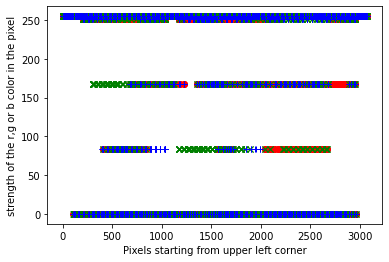

In [57]:
# import matplotlib.pyplot as plt
print('im_data.shape[0] is the y-values (verical dimension):\n',im_data.shape[0],'\nim_data.shape[1] is the x-values (horizontal dimension):\n',im_data.shape[1],'\nim_data.shape[2] is the actual rgb color of the pixel:\n',im_data.shape[2])
img_line = im_data.reshape(im_data.shape[0] * im_data.shape[1], im_data.shape[2]) # reshaping 3d array to a 2d array by putting the x,y values one long data row
print('now its a 2d array:\n',img_line)
print('new shape: ',img_line.shape)
plt.plot(img_line[:,0], 'ro') #shorthand for red circle
plt.plot(img_line[:,1], 'gx') #green x
plt.plot(img_line[:,2], 'b+') #blue plus
plt.xlabel('Pixels starting from upper left corner')
plt.ylabel('strength of the r,g or b color in the pixel') # white color shows up as full force on all 3 chanels, but blue overpowers because it is written on top (last)
plt.show()

Replacing a set of RGB values can be done as in the following. We want to give Commander Keen another t-shirt color. So by querying the color at the central pixel `im_data[32,24,:]`, we see that it is `[252, 84, 252]`. Consequently, we find all pixels with these values and assign a new value to those positions.

In [58]:
im_data_orig = np.copy(im_data)

(64, 48, 3)
[252  84 252]


<IPython.core.display.Javascript object>


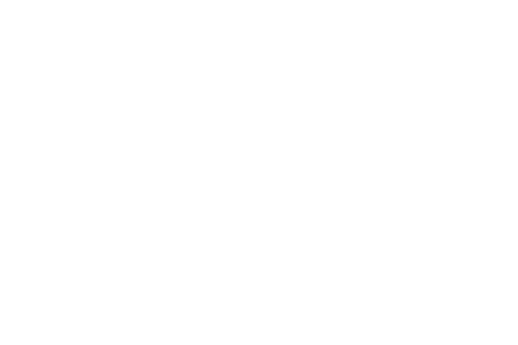

<IPython.core.display.Javascript object>


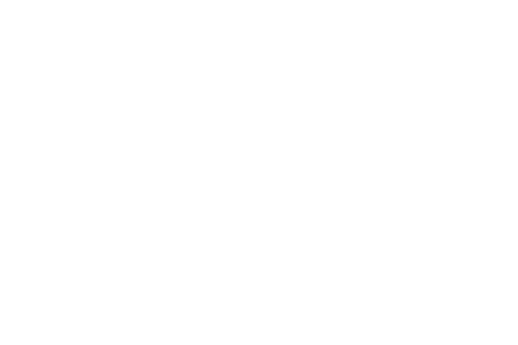

In [59]:
%matplotlib notebook
print(im_data.shape)
print(im_data_orig[32,24,:]) # pink color from 32px down - 24px right in commander_keen img

mask = (im_data_orig[:,:,0] == 252) & (im_data_orig[:,:,1] == 84) & (im_data_orig[:,:,2] == 252)
im_data[mask] = np.array([250, 230, 0]) # replace the pixels chosen by the mask with [250,230,0]=yellow
plt.figure()
plt.subplot(1, 2, 2) # 1=row, 2=column, 2=index (image will have one row with 2 columns AND this plot will be in the second column/index)
plt.title('Original')
plt.imshow(im_data_orig)
plt.subplot(1, 2, 1)
plt.title('Modified')
plt.imshow(im_data)
plt.show()

As you saw above, each channel for the RGB values is represented with the help of a two-dimensional array. We can split them up to inspect the respective intensities.

upper left corner is all white and red,green,blue==255: 255 
 somewhere in the center: 0


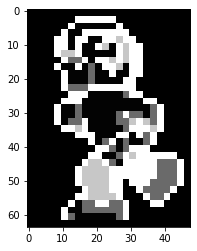

In [60]:
%matplotlib inline
red_channel = im_data_orig[:,:,0] # red=0, green=1, blue=2
print('upper left corner is all white and red,green,blue==255:',red_channel[0,0],'\n somewhere in the center:',red_channel[50,24])
plt.imshow(red_channel, cmap=plt.cm.Greys) # low value becomes light and close to 255 becomes black.

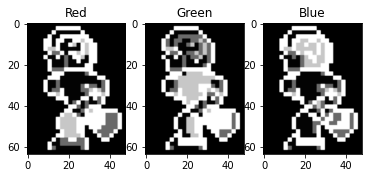

In [61]:
channels = [('Red', 0), ('Green', 1), ('Blue', 2)]
plt.figure()
for channel, channel_idx in channels:
    plt.subplot(1, 3, channel_idx+1)
    plt.title('{}'.format(channel))
    imarray = im_data_orig[:,:,channel_idx]
    plt.imshow(imarray, cmap=plt.cm.Greys)